In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("C:/Users/DELL/Downloads/OA Humidity.csv")
df2 = pd.read_csv("C:/Users/DELL/Downloads/OA Temp.csv")
df3 = pd.read_csv("C:/Users/DELL/Downloads/OA wbt.csv")

In [3]:
df1 = df1.drop(columns = ["Excel Time", "Notes"])
df2 = df2.drop(columns = ["Excel Time", "Notes"])
df3 = df3.drop(columns = ["Excel Time", "Notes"])

In [4]:
df1["Day"] = df1["Value"]
df2["Day"] = df2["Value"]
df3["Day"] = df3["Value"]

for i in range (len(df1["Date"])):
    x1 = df1["Date"][i].split()
    df1["Day"][i] = x1[0]

    x2 = df2["Date"][i].split()
    df2["Day"][i] = x2[0]

    x3 = df3["Date"][i].split()
    df3["Day"][i] = x3[0]

df1 = df1.drop(columns = ["Date"])
df2 = df2.drop(columns = ["Date"])
df3 = df3.drop(columns = ["Date"])

C:\Users\DELL\AppData\Local\Temp\ipykernel_55340\3442752515.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Day"][i] = x1[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_55340\3442752515.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Day"][i] = x2[0]
C:\Users\DELL\AppData\Local\Temp\ipykernel_55340\3442752515.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Day"][i] = x3[0]


In [5]:
df1.rename(columns = {'Value':'Humidity'}, inplace = True)
df2.rename(columns = {'Value':'Temp'}, inplace = True)
df3.rename(columns = {'Value':'WBT'}, inplace = True)

In [6]:
print (df1.shape, df2.shape , df3.shape)

(104773, 2) (104773, 2) (104773, 2)


In [7]:
df1["Day"] = pd.to_datetime(df1["Day"])
df1 = df1.groupby("Day").mean()

df2["Day"] = pd.to_datetime(df2["Day"])
df2 = df2.groupby("Day").mean()

df3["Day"] = pd.to_datetime(df3["Day"])
df3 = df3.groupby("Day").mean()

In [8]:
df = pd.merge(pd.merge(df1,df2,on='Day'),df3,on='Day')

df = df.reset_index()

df.head()

,Day,Humidity,Temp,WBT
0,2016-12-15,50.635511,20.077211,13.573652
1,2016-12-16,57.680686,16.875644,11.864111
2,2016-12-17,63.330058,16.262500,12.154527
3,2016-12-18,60.613870,16.005556,11.467712
4,2016-12-19,61.171113,16.300695,11.795010


In [9]:
df.shape

(366, 4)

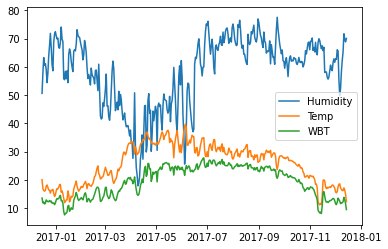

In [10]:
plt.plot(df['Day'],df['Humidity'], label = "Humidity")
plt.plot(df['Day'],df['Temp'], label = "Temp")
plt.plot(df['Day'],df['WBT'], label = "WBT")
plt.legend()
plt.show()

In [11]:
df.to_csv("Combined_data")